In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 数据
# X=[0.01,1.01,2.02,3.98]
# Y=[-5,-0.5,4,13]

In [5]:
features=[0.01,1.01,2.02,3.98]  ### 我们的X
labels=[-5,-0.5,4,13] ### 我们的y
# a=0
# b=0

In [6]:
def plot_feature_label(features,labels):
    plt.scatter(features, labels, c='b')
    plt.show()

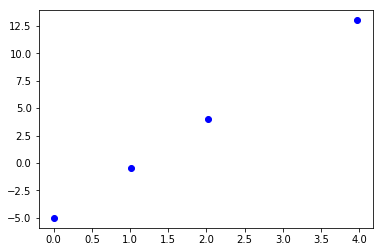

In [7]:
plot_feature_label(features,labels)

# 假设模型 y=ax+b
# 需要确定的参数是a,b 真实的值为(4.5,-5)
# loss_fun: $1/2\sum_{i=1}^n (ax_i+b-y_i)^2$

In [15]:
def loss_fun(a,b,features,labels):
    # 根据样本数量进行算是函数的计算
    loss_values=[0.5*np.square(a*features[i]+b-labels[i]) for i in range(len(labels)) ]
    return np.sum(loss_values)

In [12]:
def dfun(a,b,features,labels):
# y=ax+b
    x1_list=[(a*features[i]+b-labels[i])*features[i] for i in range(len(features))] #对a求导
    x2_list=[(a*features[i]+b-labels[i]) for i in range(len(features))] #对b求导
    x1=np.sum(x1_list)
    x2=np.sum(x2_list)
    return x1,x2

In [13]:
# Gradient Descent
def GD(x_start, epochs, lr, features, labels):
    """
    梯度下降法。给定起始点与目标函数的一阶导函数，求在epochs次迭代中x的更新值
    :param x_start: x的起始点
    :param epochs: 迭代周期
    :param lr: 学习率
    """
    a, b = x_start[0],x_start[1]
    x_loss=[]
    tra_a,tra_b=[],[]
    tra_a.append(a)
    tra_b.append(b)
    x_loss.append(loss_fun(a,b,features,labels))
    for i in range(epochs):
        x1,x2 = dfun(a,b,features,labels)
        # 表示要改变的幅度
        a, b = a - lr *x1, b - lr *x2
        tra_a.append(a)
        tra_b.append(b)
        print(a,b,x1,x2)
        x_loss.append(loss_fun(a,b,features,labels))
    return x_loss,a,b,tra_a,tra_b

In [20]:
x_loss,a,b,tra_a,tra_b=GD([0,1], 100, 0.01, features, labels)

0.52245 1.075 -52.245 -7.5
0.9302287455 1.11032401 -40.77787455 -3.532401000000001
1.250134798402845 1.1156089916659 -31.990605290284506 -0.5284981665900013
1.5026783190543591 1.0982251691513842 -25.254352065151405 1.738382251451572
1.7035570453867586 1.0638081443877128 -20.087872633239954 3.441702476367137
1.8647858327763 1.0166661140260538 -16.12287873895415 4.714203036165895
1.9955610703299862 0.9600915040041154 -13.077523755368606 5.657461002193841
2.102922203011095 0.8965994567067858 -10.73611326811087 6.349204729732964
2.192257982617725 0.8281103397871354 -8.933577960663023 6.84891169196503
2.2676938926246906 0.7560894158158857 -7.5435910006965265 7.2020923971249715
2.332388637579879 0.681653727920997 -6.469474495518832 7.443568789488872
2.3887610412842224 0.6056538964460496 -5.637240370434354 7.59998314749474
2.4386636880983805 0.5287367154900552 -4.990264681415829 7.691718095599441
2.4835158077462967 0.4513930559659467 -4.485211964791629 7.734365952410851
2.524404969917335 0.37

In [21]:
a,b,min(x_loss)

(3.9731131314590202, -3.5269505754500323, 2.009485121615908)

In [22]:
def plot_learning(tra_a,tra_b):
    plt.scatter(4.5,-5, labels, c='r')
    plt.scatter(tra_a, tra_b, c='b')
    plt.plot(tra_a, tra_b, c='b')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


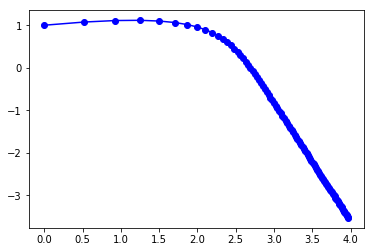

In [23]:
plot_learning(tra_a,tra_b)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


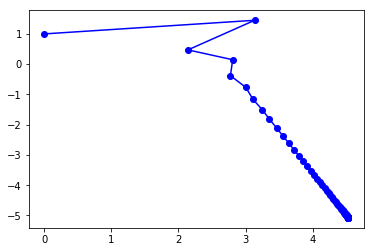

In [17]:
plot_learning(tra_a,tra_b)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


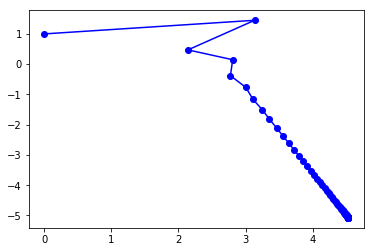

In [19]:
plot_learning(tra_a,tra_b)

In [18]:
x_loss,a,b,tra_a,tra_b=GD([0,0], 100, 0.03, features, labels)

1.77795 0.345 -59.265 -11.5
2.3662814715 0.27416373 -19.61104905 2.361209
2.59992358112 0.0879252045021 -7.78807032072 6.20795084993
2.72600654169 -0.125169726222 -4.20276535213 7.10316435748
2.81775819634 -0.339246336755 -3.05838848865 7.13588701774
2.89695324318 -0.546956652494 -2.63983489436 6.92367719132
2.97013937823 -0.746420207208 -2.43953783517 6.64878515712
3.03935481228 -0.937361135398 -2.30718113507 6.36469760635
3.10529919368 -1.11996592262 -2.19814604648 6.08682624063
3.16827190454 -1.29454602209 -2.09909036198 5.81933664915
3.2284498382 -1.46143856254 -2.00593112218 5.56308468148
3.28596975762 -1.62097747096 -1.91733064721 5.31796361403
3.34095283217 -1.7734854054 -1.83276915183 5.08359781465
3.39351206079 -1.9192718232 -1.75197428734 4.85954726027
3.44375462481 -2.05863284442 -1.67475213382 4.64536737395
3.4917827339 -2.19185162708 -1.60093696974 4.44062608846
3.53769401964 -2.31919887559 -1.53037619147 4.24490828367
3.58158178888 -2.44093337105 -1.46292564124 4.05781651

# 数据
# X=[0.01,1.01,2.02,3.98]
# $X=[[1,1,1,1],[0.01,1.01,2.02,3.98]]^T$
# $Y=[-5,-0.5,4,13]^T$
# ${\theta}=[\theta_0,\theta_1]$
# loss_fun: $Y={\theta}^{T}X$

In [24]:
X = np.transpose(np.matrix([[1,1,1,1],[0.01,1.01,2.02,3.98]]))
y =  np.transpose(np.matrix([-5,-0.5,4,13]))
theta = np.transpose(np.matrix([0,0]))

In [25]:
x_loss=[]
theta = np.transpose(np.matrix([0,0]))
theta_his = []
epochs = 50
for i in range(epochs):
    loss = (X*theta-y).T*(X*theta-y)
    Gd = X.T*X*theta-X.T*y
    theta = theta-0.04*Gd
    x_loss.append(np.array(loss)[0][0])
    theta_his.append(np.array(theta.T))

In [26]:
x_loss

[210.25,
 52.522531682760004,
 46.03211193235287,
 40.77995673913513,
 36.128818749843326,
 32.008281732930506,
 28.35780869501554,
 25.12377549976813,
 22.258675388181388,
 19.720421092746587,
 17.47172659085531,
 15.47955938683217,
 13.714655276715197,
 12.151088467856312,
 10.765890738556937,
 9.538714043333728,
 8.4515316076098,
 7.488373121022312,
 6.635090139433507,
 5.879148249486873,
 5.209442942682253,
 4.6161364942276935,
 4.0905134504783005,
 3.6248526021257734,
 3.2123135624717545,
 2.8468362846615793,
 2.5230520418234694,
 2.2362045624441946,
 1.9820801624888136,
 1.7569458479310156,
 1.5574944784430558,
 1.380796186719912,
 1.2242553398055347,
 1.0855724101988047,
 0.9627101966397767,
 0.8538638983719945,
 0.7574346032827659,
 0.6720058004719539,
 0.5963225722275124,
 0.5292731597455739,
 0.46987263180227556,
 0.41724841647610467,
 0.37062748338711665,
 0.3293249881647894,
 0.29273421233595176,
 0.26031765085342845,
 0.23159911634446353,
 0.2061567440932544,
 0.1836167950

In [27]:
theta_his

[array([[0.46  , 2.3706]]),
 array([[0.18073552, 2.62632262]]),
 array([[-0.12565355,  2.74625921]]),
 array([[-0.41669857,  2.85176616]]),
 array([[-0.69080274,  2.95062171]]),
 array([[-0.94880888,  3.04364035]]),
 array([[-1.19165367,  3.13119098]]),
 array([[-1.42022751,  3.21359652]]),
 array([[-1.63536901,  3.29115941]]),
 array([[-1.83786753,  3.36416426]]),
 array([[-2.02846605,  3.43287891]]),
 array([[-2.20786388,  3.49755549]]),
 array([[-2.37671924,  3.55843129]]),
 array([[-2.53565167,  3.61572967]]),
 array([[-2.68524429,  3.66966086]]),
 array([[-2.82604597,  3.72042273]]),
 array([[-2.95857332,  3.76820154]]),
 array([[-3.08331258,  3.81317259]]),
 array([[-3.20072143,  3.85550088]]),
 array([[-3.31123065,  3.8953417 ]]),
 array([[-3.41524569,  3.93284124]]),
 array([[-3.51314821,  3.9681371 ]]),
 array([[-3.60529739,  4.00135875]]),
 array([[-3.69203135,  4.03262811]]),
 array([[-3.7736683,  4.0620599]]),
 array([[-3.8505078 ,  4.08976211]]),
 array([[-3.92283175,  4.1